Identificación de créditos riesgosos usando TensorFlow 2.4
===

* 10:54 min | Ultima modificación: Mayo 7, 2021 | [YouTube]

In [1]:
import warnings

warnings.filterwarnings("ignore")

## Descripción del problema

Las entidades financieras desean mejorar sus procedimientos de aprobación de créditos con el fin de disminuir los riesgos de no pago de la deuda, lo que acarrea pérdidas a la entidad. El problema real consiste en poder decidir si se aprueba o no un crédito particular con base en información que puede ser fácilmente recolectada por teléfono o en la web.

Se tiene una muestra de 1000 observaciones. Cada registro contiene 20 atributos que recopilan información tanto sobre el crédito como sobre la salud financiera del solicitante. La información fue recolectada por una firma alemana y se puede descargar de https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data).

Los atributos y sus valores son los siguientes:

     Attribute 1:  (qualitative)
     	      Status of existing checking account
     	      A11 :      ... <    0 DM
     	      A12 : 0 <= ... <  200 DM
     	      A13 :      ... >= 200 DM /
     	            salary assignments for at least 1 year
     	      A14 : no checking account

     Attribute 2:  (numerical)
     	      Duration in month

     Attribute 3:  (qualitative)
     	      Credit history
     	      A30 : no credits taken/
     	            all credits paid back duly
     	      A31 : all credits at this bank paid back duly
     	      A32 : existing credits paid back duly till now
     	      A33 : delay in paying off in the past
     	      A34 : critical account/
     	            other credits existing (not at this bank)

     Attribute 4:  (qualitative)
     	      Purpose
     	      A40 : car (new)
     	      A41 : car (used)
     	      A42 : furniture/equipment
     	      A43 : radio/television
     	      A44 : domestic appliances
     	      A45 : repairs
     	      A46 : education
     	      A47 : (vacation - does not exist?)
     	      A48 : retraining
     	      A49 : business
     	      A410 : others

     Attribute 5:  (numerical)
     	      Credit amount

     Attribute 6:  (qualitative)
     	      Savings account/bonds
     	      A61 :          ... <  100 DM
     	      A62 :   100 <= ... <  500 DM
     	      A63 :   500 <= ... < 1000 DM
     	      A64 :          .. >= 1000 DM
     	      A65 :   unknown/ no savings account

     Attribute 7:  (qualitative)
     	      Present employment since
     	      A71 : unemployed
     	      A72 :       ... < 1 year
     	      A73 : 1  <= ... < 4 years  
     	      A74 : 4  <= ... < 7 years
     	      A75 :       .. >= 7 years

     Attribute 8:  (numerical)
     	      Installment rate in percentage of disposable income

     Attribute 9:  (qualitative)
     	      Personal status and sex
     	      A91 : male   : divorced/separated
     	      A92 : female : divorced/separated/married
     	      A93 : male   : single
     	      A94 : male   : married/widowed
     	      A95 : female : single

     Attribute 10: (qualitative)
     	      Other debtors / guarantors
     	      A101 : none
     	      A102 : co-applicant
     	      A103 : guarantor

     Attribute 11: (numerical)
     	      Present residence since

     Attribute 12: (qualitative)
     	      Property
     	      A121 : real estate
     	      A122 : if not A121 : building society savings agreement/
     				   life insurance
     	      A123 : if not A121/A122 : car or other, not in attribute 6
     	      A124 : unknown / no property

     Attribute 13: (numerical)
     	      Age in years

     Attribute 14: (qualitative)
     	      Other installment plans 
     	      A141 : bank
     	      A142 : stores
     	      A143 : none

     Attribute 15: (qualitative)
     	      Housing
     	      A151 : rent
     	      A152 : own
     	      A153 : for free

     Attribute 16: (numerical)
              Number of existing credits at this bank

     Attribute 17: (qualitative)
     	      Job
     	      A171 : unemployed/ unskilled  - non-resident
     	      A172 : unskilled - resident
     	      A173 : skilled employee / official
     	      A174 : management/ self-employed/
     		         highly qualified employee/ officer

     Attribute 18: (numerical)
     	      Number of people being liable to provide maintenance for

     Attribute 19: (qualitative)
     	      Telephone
     	      A191 : none
     	      A192 : yes, registered under the customers name

     Attribute 20: (qualitative)
     	      foreign worker
     	      A201 : yes
     	      A202 : no


## Obtención de datos usando Pandas

In [2]:
import pandas as pd

URL = "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/credit.csv"

df = pd.read_csv(
    URL,
    sep=",",  # separador de campos
    thousands=None,  # separador de miles para números
    decimal=".",  # separador de los decimales para números
    encoding="latin-1",  # idioma
)

#
# Verifica la lectura de los datos
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [3]:
#
# Contenido del archivo
#
df.head()

checking_balance  months_loan_duration credit_history    purpose  amount  \
0           < 0 DM                     6       critical   radio/tv    1169   
1       1 - 200 DM                    48         repaid   radio/tv    5951   
2          unknown                    12       critical  education    2096   
3           < 0 DM                    42         repaid  furniture    7882   
4           < 0 DM                    24        delayed  car (new)    4870   

  savings_balance employment_length  installment_rate personal_status  \
0         unknown           > 7 yrs                 4     single male   
1        < 100 DM         1 - 4 yrs                 2          female   
2        < 100 DM         4 - 7 yrs                 2     single male   
3        < 100 DM         4 - 7 yrs                 2     single male   
4        < 100 DM         1 - 4 yrs                 3     single male   

  other_debtors  ...                  property age  installment_plan  \
0          none  ...               real estate  67              none   
1          none  ...               real estate  22              none   
2          none  ...               real estate  49              none   
3     guarantor  ...  building society savings  45              none   
4          none  ...              unknown/none  53              none   

    housing existing_credits  default  dependents  telephone foreign_worker  \
0       own                2        1           1        yes            yes   
1       own                1        2           1       none            yes   
2       own                1        1           2       none            yes   
3  for free                1        1           2       none            yes   
4  for free                2        2           2       none            yes   

                  job  
0    skilled employee  
1    skilled employee  
2  unskilled resident  
3    skilled employee  
4    skilled employee  

[5 rows x 21 columns]

## Transformación de datos

In [4]:
#
# Variables codificadas como factores
#
for column_type, column_name in zip(df.dtypes, df.dtypes.index):
    if column_type == "object":
        print("-" * 50)
        print(column_name)
        print(df[column_name].value_counts())
        print()

--------------------------------------------------
checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

--------------------------------------------------
credit_history
repaid                    530
critical                  293
delayed                    88
fully repaid this bank     49
fully repaid               40
Name: credit_history, dtype: int64

--------------------------------------------------
purpose
radio/tv               280
car (new)              234
furniture              181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: purpose, dtype: int64

--------------------------------------------------
savings_balance
< 100 DM         603
unknown          183
101 - 500 DM     103
501 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

---

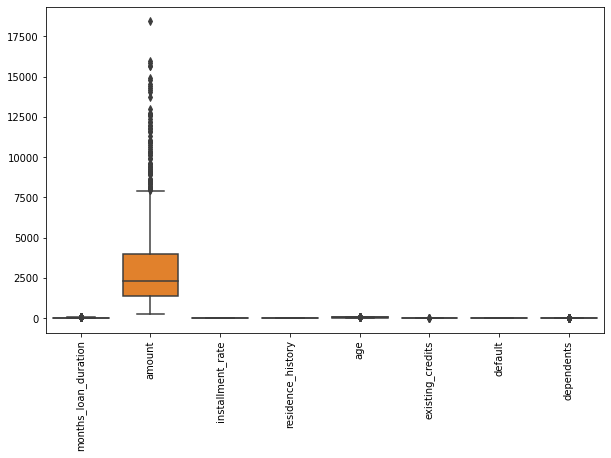

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#
# Los rangos de las variables numéricas son
# bastantes diferentes
#
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)

#
# La columna default indica si hubo problemas
# en el pago del préstamo (1- pago, 2- no pago)
# esta es la columna que se desea pronosticar
# 1-si, 2-no
#

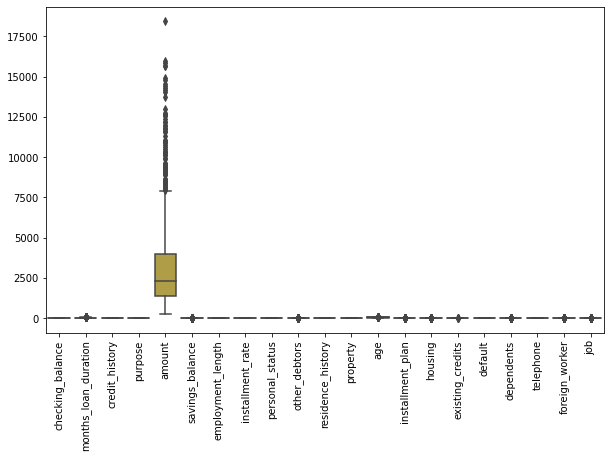

In [6]:
from sklearn.preprocessing import LabelEncoder

#
# Se construye un codificador para transformar
# los strings a enteros (similar a factores en R)
#
enc = LabelEncoder()

for column_type, column_name in zip(df.dtypes, df.dtypes.index):
    if column_type == "object":
        df[column_name] = enc.fit_transform(df[column_name])


#
# Verificación. Las variables que eran categoricas
# ahora son numéricas
#
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90);

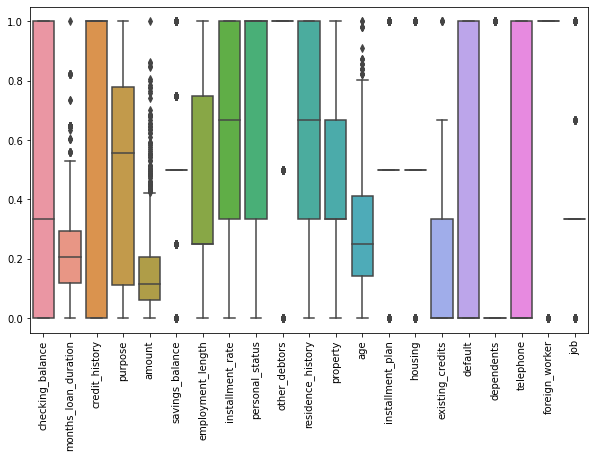

In [7]:
from sklearn.preprocessing import MinMaxScaler

#
#  Se escalan todas las variables al rango [0, 1]
#  para evitar problemas asociados a la escala
#
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_norm)
plt.xticks(rotation=90);

## Particionamiento de los datos

In [8]:
#
# Se usa el 90% de los datos para entrenamiento
# y el 10% restante para prueba
#
X_train = df_norm[:900].copy()
X_test = df_norm[900:].copy()

#
# Se elimina la columna default que
# corresponde a la variable de salida
# y se genera la variable dependiente
#
y_train_true = X_train.pop("default")
y_test_true = X_test.pop("default")

## Carga de datos a TensorFlow

In [9]:
import tensorflow as tf

#
# tf.data.Dataset permite escribir data pipelines
#
dataset_train = tf.data.Dataset.from_tensor_slices(
    (X_train.values, y_train_true.values)
)

#
# Por ejemplo, se recorren los primeros
#  cinco patrones
#
for feat, targ in dataset_train.take(5):
    print("Features: {}, Target: {}".format(feat, targ))

Features: [0.33333333 0.02941176 0.         0.77777778 0.05056674 1.
 0.75       1.         1.         1.         1.         0.66666667
 0.85714286 0.5        0.5        0.33333333 0.         1.
 1.         0.33333333], Target: 0.0
Features: [0.         0.64705882 1.         0.77777778 0.31368989 0.5
 0.25       0.33333333 0.33333333 1.         0.33333333 0.66666667
 0.05357143 0.5        0.5        0.         0.         0.
 1.         0.33333333], Target: 1.0
Features: [1.         0.11764706 0.         0.44444444 0.10157368 0.5
 0.5        0.33333333 1.         1.         0.66666667 0.66666667
 0.53571429 0.5        0.5        0.         1.         0.
 1.         1.        ], Target: 0.0
Features: [0.33333333 0.55882353 1.         0.55555556 0.41994057 0.5
 0.5        0.33333333 1.         0.5        1.         0.
 0.46428571 0.5        0.         0.         1.         0.
 1.         0.33333333], Target: 0.0
Features: [0.33333333 0.29411765 0.25       0.11111111 0.25420931 0.5
 0.25  

In [10]:
#
# Se mezcla el dataframe y se hace un batch de uno
#
dataset_train = dataset_train.shuffle(len(df_norm)).batch(1)

## Creación y entrenamiento del modelo

In [11]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    dataset_train,
    epochs=10,
    verbose=1,
)

Epoch 1/10
900/900 [==============================] - 1s 1ms/step - loss: 0.6218 - accuracy: 0.6713
Epoch 2/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7356
Epoch 3/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5127 - accuracy: 0.7514
Epoch 4/10
900/900 [==============================] - 1s 1ms/step - loss: 0.4979 - accuracy: 0.7514
Epoch 5/10
900/900 [==============================] - 1s 1ms/step - loss: 0.4844 - accuracy: 0.7594
Epoch 6/10
900/900 [==============================] - 1s 1ms/step - loss: 0.4996 - accuracy: 0.7487
Epoch 7/10
900/900 [==============================] - 1s 1ms/step - loss: 0.4644 - accuracy: 0.7705
Epoch 8/10
900/900 [==============================] - 1s 1ms/step - loss: 0.4772 - accuracy: 0.7636
Epoch 9/10
900/900 [==============================] - 1s 1ms/step - loss: 0.4792 - accuracy: 0.7495
Epoch 10/10
900/900 [==============================] - 1s 1ms/step - loss: 0.4556 - accuracy: 0.8007

## Evaluación

In [12]:
model.evaluate(
    dataset_train,
    verbose=0,
)

#
#          loss             accuracy
# -----------------------------------

[0.43317848443984985, 0.7977777719497681]

In [13]:
dataset_test = tf.data.Dataset.from_tensor_slices(
    (X_test.values, y_test_true.values)
).batch(1)

model.evaluate(
    dataset_test,
    verbose=0,
)

#
#          loss             accuracy
# -----------------------------------

[0.5790089964866638, 0.6899999976158142]

## Pronóstico

In [14]:
import numpy as np

y_test_pred = model.predict(dataset_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred = np.where(y_test_pred < 0.5, 0, 1)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_true, y_test_pred)

array([[54, 14],
       [17, 15]])